<a href="https://colab.research.google.com/github/tejasmaskar09/BML/blob/main/Skill_7_feature_filter_sel_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Diabetes.csv')

# Compute correlation matrix and find highly correlated features (threshold > 0.85)
corr_matrix = df.corr().abs()
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.85)]

# Drop highly correlated features
df_filtered = df.drop(columns=high_corr_features)
print("Removed correlated features:", high_corr_features)
df_filtered



Removed correlated features: []


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X = df.drop(columns=['diabetes'])  # Replace with correct target column
y = df['diabetes']

# Apply Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Create DataFrame with scores
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_selector.scores_})
chi2_scores = chi2_scores.sort_values(by='Chi2 Score', ascending=False)

print(chi2_scores.head(10))  # Top 10 features


       Feature   Chi2 Score
4      insulin  2175.565273
1      glucose  1411.887041
7          age   181.303689
5          bmi   127.669343
0  pregnancies   111.519691
3      triceps    53.108040
2    diastolic    17.605373
6          dpf     5.392682


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Info Score', ascending=False)

print(mi_scores_df.head(10))  # Top 10 features


       Feature  Mutual Info Score
1      glucose           0.127674
5          bmi           0.074770
7          age           0.048987
0  pregnancies           0.032122
4      insulin           0.025058
6          dpf           0.016531
3      triceps           0.011542
2    diastolic           0.000000


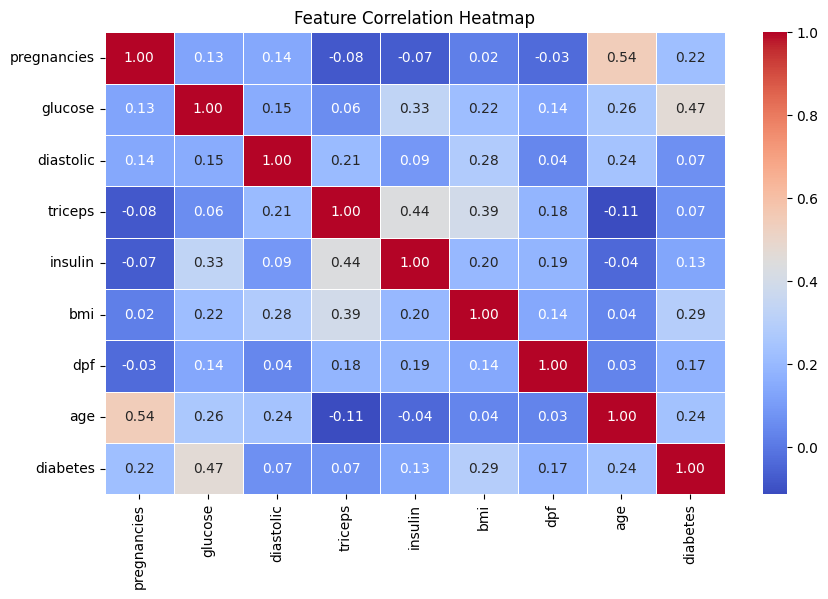

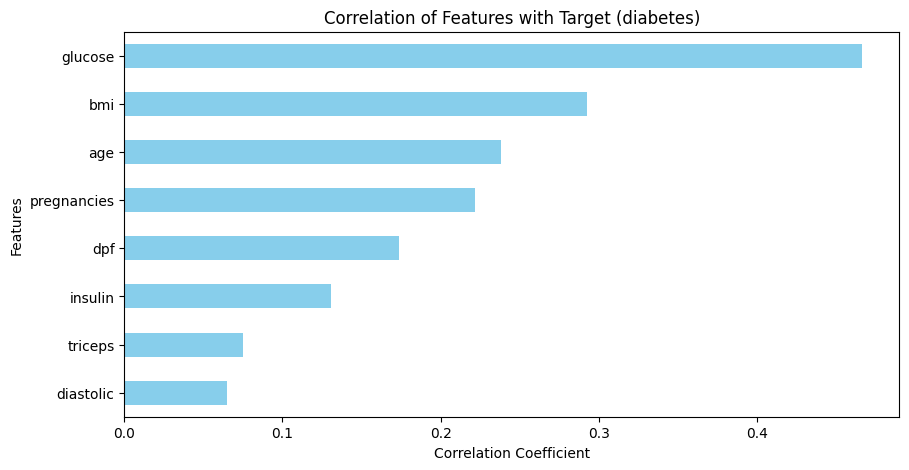

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Diabetes.csv')

# Compute correlation matrix
corr_matrix = df.corr()

# **Heatmap for correlation**
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

target = "diabetes" if "diabetes" in df.columns else df.columns[-1]

plt.figure(figsize=(10,5))
corr_matrix[target].drop(target).sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title(f"Correlation of Features with Target ({target})")
plt.show()
